In [2]:
import json
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math

In [3]:
def read_jsonfile(filename):
    data = []
    with open(filename,'r') as f:
        for line in f.readlines():
            data.append(json.loads(line))
    return data

In [4]:
def read_json(filename):
    with open(filename,'r') as f:
        data=json.load(f)
    return data
            

#### Population vs Count of tweets mentioning COVID-19

In [5]:
tweets_state = read_jsonfile('AU_Area_Ranking.json')
tweets_city = read_jsonfile('AU_City_Ranking.json')
population_state = read_json('AU_Area_Population.json')
population_city = read_json('AU_City_Population.json')

In [33]:
print(tweets_state)

[{'Area_Name': 'New South Wales', 'Times': 21898, 'Type': 'Area'}, {'Area_Name': 'Victoria', 'Times': 20762, 'Type': 'Area'}, {'Area_Name': 'Queensland', 'Times': 9575, 'Type': 'Area'}, {'Area_Name': 'Western Australia', 'Times': 4247, 'Type': 'Area'}, {'Area_Name': 'South Australia', 'Times': 3704, 'Type': 'Area'}, {'Area_Name': 'Tasmania', 'Times': 1245, 'Type': 'Area'}, {'Area_Name': 'Northern Territory', 'Times': 181, 'Type': 'Area'}]


In [31]:
print(population_state)

{'New South Wales': 7861674, 'Victoria': 6321648, 'Queensland': 4929152, 'South Australia': 1723671, 'Tasmania': 522152, 'Northern Territory': 247491, 'Australian Capital Territory': 411667, 'Western Australia': 2575452}


In [6]:
cities = list(population_city.keys())

In [6]:
states = list(population_state.keys())

In [7]:
# Get the percentage of population
def get_ratio_pop(population):
    population_perc = []
    total_pop = 0
    for u,v in population.items():
        total_pop += int(v)
    for u,v in population.items():
        population_perc.append(round(int(v)/total_pop,2))
    return population_perc

In [8]:
population_perc_state = get_ratio_pop(population_state)
population_perc_city = get_ratio_pop(population_city)

In [9]:
print(get_ratio_pop(population_state))
print(get_ratio_pop(population_city))

[0.32, 0.26, 0.2, 0.07, 0.02, 0.01, 0.02, 0.1]
[0.32, 0.3, 0.15, 0.08, 0.13, 0.01, 0.01]


In [10]:
# Get the percentage of twitter count for states
tweet_perc_state = []
total_tweets_state = 0
for state in states:
    for item in tweets_state:
        if item['Area_Name'] == state:
            total_tweets_state += item['Times']           
for state in states:
    for item in tweets_state:
        if state == 'Australian Capital Territory':
            tweet_perc_state.append(0.0)
            break
        elif item['Area_Name'] == state:
            tweet_perc_state.append(round(item['Times']/total_tweets_state,2))

In [11]:
print(total_tweets_state)
print(tweet_perc_state)

61612
[0.36, 0.34, 0.16, 0.06, 0.02, 0.0, 0.0, 0.07]


In [12]:
# Get the percentage of twitter count for cities
tweet_perc_city = []
total_tweets_city = 0
for city in cities:
    for item in tweets_city:
        if item['Area_Name'] == city:
            total_tweets_city += item['Times']           
for city in cities:
    for item in tweets_city:
        if item['Area_Name'] == city:
            tweet_perc_city.append(round(item['Times']/total_tweets_city,2))
tweet_perc_city.append(0.0)

In [13]:
print(total_tweets_city)
print(tweet_perc_city)

45504
[0.35, 0.37, 0.11, 0.07, 0.09, 0.01, 0.0]


In [14]:
df_city = pd.DataFrame({'x':cities,'y1':tweet_perc_city,'y2':population_perc_city})

In [17]:
df_pop_city = pd.DataFrame({'City':cities,'Tweets%':tweet_perc_city,'Population%':population_perc_city})
df_pop_city.to_csv('Population_city.csv',index=False)

In [84]:
df_state = pd.DataFrame({'x':states,'y1':tweet_perc_state,'y2':population_perc_state})

In [18]:
df_pop_state = pd.DataFrame({'State':states,'Tweets%':tweet_perc_state,'Population%':population_perc_state})
df_pop_state.to_csv('Population_state.csv',index=False)

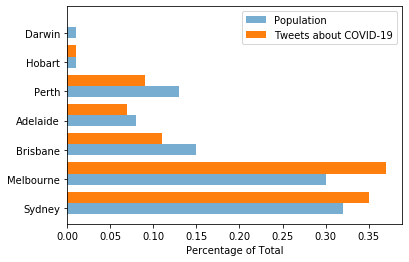

In [297]:
fig1 = plt.figure()
index = np.arange(len(df_city['x']))
bar_width = 0.38
opacity = 0.6
plt.barh( index, df_city['y2'], bar_width, alpha = opacity,label = 'Population')
plt.barh( index + bar_width, df_city['y1'],bar_width,label = 'Tweets about COVID-19')
plt.yticks(index, df_city['x'])
plt.legend()
plt.xlabel('Percentage of Total')
#plt.ylabel('State')
plt.savefig('Population_City.png',bbox_inches='tight')
plt.show()

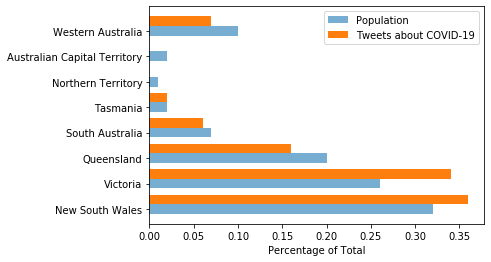

In [298]:
fig2 = plt.figure()
index = np.arange(len(df_state['x']))
bar_width = 0.38
opacity = 0.6
plt.barh( index, df_state['y2'], bar_width, alpha = opacity,label = 'Population')
plt.barh( index + bar_width, df_state['y1'],bar_width, data=df_state,label = 'Tweets about COVID-19')
plt.yticks(index, df_state['x'])
plt.legend()
plt.xlabel('Percentage of Total')
#plt.ylabel('State')
plt.savefig('Population_State.png',bbox_inches='tight')
plt.show()

#### Attitude towards COVID-19 vs Income

In [7]:
sentiments = read_jsonfile('Sentiments.json')
sentiment_city = []
sentiment_state = []
for item in sentiments:
    if item['type'] == 'SemCity':
        sentiment_city.append(item)
    else:
        sentiment_state.append(item)

In [8]:
the_dict={}
sentiment_cities = {}
for city in cities:
    for item in sentiment_city:
        if item['Name'] == city:
            the_dict['Positive'] = item['pos']
            the_dict['Negative'] = item['neg']
            the_dict['Neutral'] = item['neu']
            sentiment_cities[city] = dict(the_dict)
print(sentiment_cities)

{'Sydney': {'Positive': 5755, 'Negative': 5708, 'Neutral': 4454}, 'Melbourne': {'Positive': 6450, 'Negative': 5414, 'Neutral': 4776}, 'Brisbane': {'Positive': 1994, 'Negative': 1552, 'Neutral': 1430}, 'Adelaide': {'Positive': 1216, 'Negative': 917, 'Neutral': 870}, 'Perth': {'Positive': 1575, 'Negative': 1259, 'Neutral': 1332}, 'Hobart': {'Positive': 187, 'Negative': 170, 'Neutral': 134}, 'Darwin': {'Positive': 50, 'Negative': 55, 'Neutral': 30}}


In [9]:
def senti_ratio(attitude):
    senti_ratio_city = {}
    for item in sentiment_city:
        ttl = item['pos']+item['neg']+item['neu']
        ratio = round(item[attitude]/ttl,4)
        senti_ratio_city[item['Name']] = ratio
    return senti_ratio_city

In [10]:
pos_ratio_city = senti_ratio('pos')
neg_ratio_city = senti_ratio('neg')
neu_ratio_city = senti_ratio('neu')

In [11]:
print(neg_ratio_city)
print(pos_ratio_city)
print(cities)

{'Melbourne': 0.3254, 'Sydney': 0.3586, 'Perth': 0.3022, 'Brisbane': 0.3119, 'Adelaide': 0.3054, 'Hobart': 0.3462, 'Darwin': 0.4074}
{'Melbourne': 0.3876, 'Sydney': 0.3616, 'Perth': 0.3781, 'Brisbane': 0.4007, 'Adelaide': 0.4049, 'Hobart': 0.3809, 'Darwin': 0.3704}
['Sydney', 'Melbourne', 'Brisbane', 'Adelaide', 'Perth', 'Hobart', 'Darwin']


In [12]:
senti_city_df = pd.DataFrame({'City':list(pos_ratio_city.keys()),'Positive Rate':list(pos_ratio_city.values()),
                              'Negative Rate':list(neg_ratio_city.values()),'Neutral Rate':list(neu_ratio_city.values())})
senti_city_df.to_csv('Sentiment_City.csv',index=False)

In [23]:
def plot_pie_city(the_city,senti_distr):
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))
    data = list(senti_distr.values())

    wedges,texts,autotexts = ax.pie(data, wedgeprops=dict(width=0.55), startangle=90,autopct='%1.2f%%')
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.7)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(list(senti_distr.keys())[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)
    ax.set_title(the_city)
    plt.savefig('Sentiment'+ the_city + '.png',bbox_inches='tight')
    plt.show()

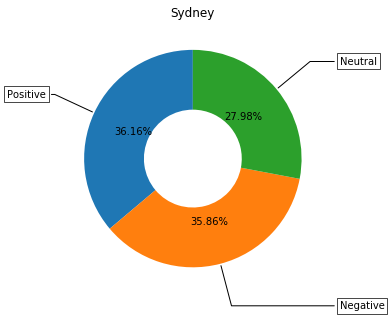

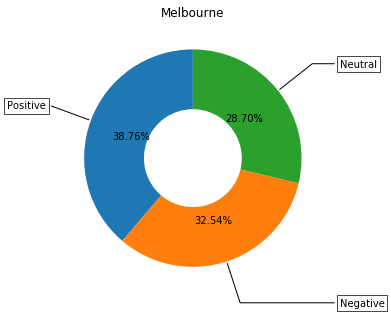

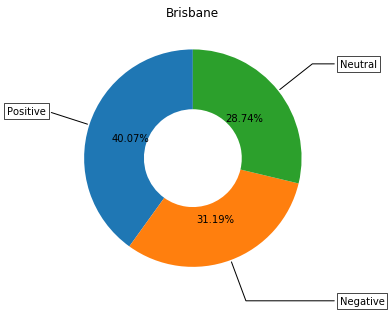

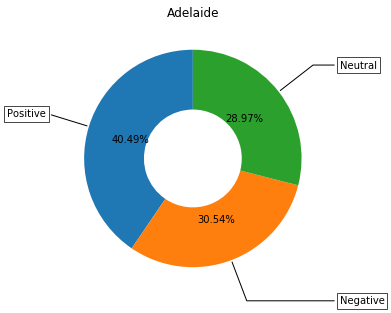

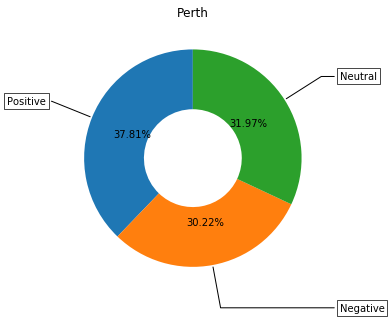

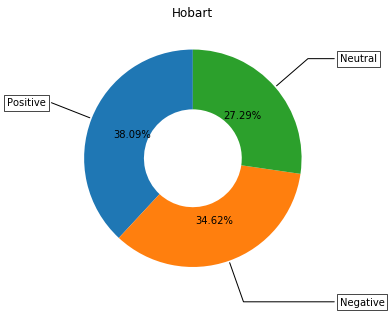

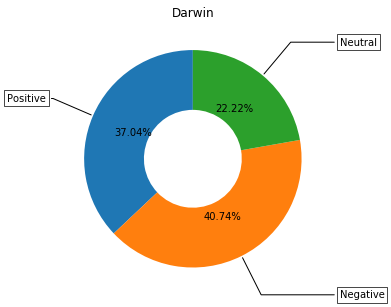

In [24]:
for city in cities:
    plot_pie_city(city,sentiment_cities[city])



In [25]:
income_city = read_json('AU_City_Income.json')
education_city = read_json('AU_City_Education.json')
life_city = read_json('AU_City_LifeSatisfaction.json')

In [243]:
print(income_city)

{'Sydney': {'mean': '66353', 'median': '48381', 'total': '172926801782'}, 'Melbourne': {'mean': '60467', 'median': '46363', 'total': '144873818735'}, 'Brisbane': {'mean': '60587', 'median': '47690', 'total': '74215136853'}, 'Adelaide': {'mean': '56109', 'median': '45778', 'total': '39296393081'}, 'Perth': {'mean': '70700', 'median': '53001', 'total': '80777010693'}, 'Hobart': {'mean': '53136', 'median': '44265', 'total': '6251288106'}, 'Darwin': {'mean': '68726', 'median': '59187', 'total': '5848235151'}}


In [26]:
def life_ratio(level):
    life_ratio_city = {}
    for city in cities:
        for u,v in life_city.items():
            if u == city:
                life_ratio_city[city] = float(v['Life Satisfaction'+str(level)])
    return life_ratio_city

In [179]:
print(life_ratio('80-100'))
print(life_ratio('0-60'))

{'Melbourne': 0.673441, 'Sydney': 0.662256, 'Perth': 0.611134, 'Brisbane': 0.570074, 'Adelaide': 0.599754, 'Hobart': 0.630383, 'Darwin': 0.673206}
{'Melbourne': 0.112881, 'Sydney': 0.11625, 'Perth': 0.152073, 'Brisbane': 0.182297, 'Adelaide': 0.181829, 'Hobart': 0.154461, 'Darwin': 0.12461}


In [27]:
edu_ratio_city = {}
for city in cities:
    for u,v in education_city.items():
        if u == city:
            ttl = int(v['Not stated']) + int(v['Inadequate']) +int(v['Diploma'])+int(v['Postgraduate'])+int(v['Graduate']) + int(v['Certificate']) + int(v['Bachelor'])
            edu_ratio_city[city] = round((int(v['Postgraduate'])+int(v['Graduate'])+int(v['Bachelor']))/ttl,2)
print(edu_ratio_city)

{'Sydney': 0.45, 'Melbourne': 0.45, 'Brisbane': 0.38, 'Adelaide': 0.37, 'Perth': 0.37, 'Hobart': 0.36, 'Darwin': 0.3}


In [28]:
income_median_city = {}
for city in cities:
    for u,v in income_city.items():
        if u == city:
            income_median_city[city] = int(v['median'])
print(income_median_city)

{'Sydney': 48381, 'Melbourne': 46363, 'Brisbane': 47690, 'Adelaide': 45778, 'Perth': 53001, 'Hobart': 44265, 'Darwin': 59187}


In [136]:
def NormalizeData(data):
    xmin=min(data)
    xmax=max(data)
    new = []
    for d in data:
        new.append(round((d-xmin)/(xmax-xmin),2))
    return new

In [138]:
ss = [1,5,10,15]
print(NormalizeData(ss))

[0.0, 0.29, 0.64, 1.0]


In [141]:
income_median = NormalizeData(list(income_median_city.values()))
print(income_median)

[0.14, 0.28, 0.59, 0.23, 0.1, 0.0, 1.0]


In [29]:
df_senti_city = pd.DataFrame({'x':cities,'y1':list(pos_ratio_city.values()),'y2':list(neg_ratio_city.values()),
                              'y3':list(neu_ratio_city.values()),'y4':list(edu_ratio_city.values()),
                              'y5':list(life_ratio('80-100').values()),'y6':list(life_ratio('0-60').values())})

In [31]:
df_senti_city_c = pd.DataFrame({'City':cities,'Positive Rate':list(pos_ratio_city.values()),'Nagative Rate':list(neg_ratio_city.values()),
                              'Neutral Rate':list(neu_ratio_city.values()),'High Education Rate':list(edu_ratio_city.values()),
                              'High Life Satisfaction Rate':list(life_ratio('80-100').values())})

df_senti_city_c.to_csv('Senti_Income_Life_City.csv',index=False)

In [30]:
df_senti_city.head()

,x,y1,y2,y3,y4,y5,y6
0,Sydney,0.39,0.33,0.29,0.45,0.662256,0.116250
1,Melbourne,0.36,0.36,0.28,0.45,0.673441,0.112881
2,Brisbane,0.38,0.30,0.32,0.38,0.570074,0.182297
3,Adelaide,0.40,0.31,0.29,0.37,0.599754,0.181829
4,Perth,0.40,0.31,0.29,0.37,0.611134,0.152073


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


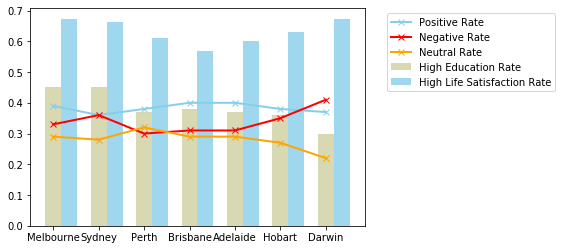

In [296]:
fig3 = plt.figure()
index = np.arange(len(df_senti_city['x']))

plt.plot(index, 'y1', data=df_senti_city, marker='x', color='skyblue', linewidth=2,label = 'Positive Rate')
plt.plot(index, 'y2', data=df_senti_city, marker='x', color='red', linewidth=2,label = 'Negative Rate')
plt.plot(index, 'y3', data=df_senti_city, marker='x', color='orange', linewidth=2,label = 'Neutral Rate')
plt.bar(index, 'y4',0.35, data=df_senti_city,alpha = 0.3,color = 'olive',label='High Education Rate')
plt.bar(index+0.35,'y5',0.35,data=df_senti_city,alpha = 0.8, color='skyblue',label = 'High Life Satisfaction Rate')
#plt.plot( index, 'y5', data=df_senti_city, marker='o', color='skyblue', linewidth=2,label = 'High Life Satisfaction Rate')
#plt.plot( 'x', 'y4', data=df_senti_city, marker='o', color='lightgreen', linewidth=2,label = 'High Education Rate')
#plt.plot( 'x', 'y6', data=df_senti_city, marker='o', color='lightblue', linewidth=2,label = 'Low Life Satisfaction Rate')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(index, df_senti_city['x'])
plt.savefig('Senti_Edu_Life_City.png',bbox_inches='tight')
plt.show()

**Analysis:** People from most of the cities show positive attitude towards COVID-19. However, Darwin which has lowest High Education rate has the highest negative rate. For the cities which have higher High Education Rate like Melbourne and Sydney, the rate of three attitudes are close to each other. However Sydney has higher negative rate and lower positive rate than Melbourne which may come from the result that Melbourne has higher Life Satisfacton Rate then Sydney. For medium High Education Level ratio cities, Perth, Brisbane and Adelaide, people are more positive towards COVID-19 since the positive rates are much higher than negative and neutral.